## Homework 1: Basics of Machine Learning 

January 29, 2025 | MUSA 6500

Jun, Youngang <br> Master of Urban Spatial Analytics <br> University of Pennsylvania

### 1. Data Exploration

In [4]:
# Check the Python version being used
import sys
print(sys.executable)  # Shows the full path of the Python interpreter being used
print(sys.version)     # Displays the Python version

/opt/anaconda3/bin/python
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

# Data Loading: Load the MNIST dataset using Keras consists of grayscale 28 × 28 images of handwritten digits (0-9).
# * MNIST: Modified National Institute of Standards and Technology database
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 1.1 Dimensionality

**1. What is the type of the training and testing datasets?**

By using `type()`, which is a built-in Python function that returns the data type (class) of an object, it turns out that `x_train`, `x_test`, `y_train`, `y_test` are all classes and instances of NumPy’s array type, which is called `numpy.ndarray` (N-dimensional array).

In [6]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**2. How many features are in the training and the testing dataset? How many samples are in each dataset?**

According to `x_train.shape` and `x_test.shape`, which return the shape (dimensions) of the NumPy array, it turns out that the training dataset includes **60,000 training images (samples)** and each image has 28 × 28 = **784 pixels (features per sample)**. Therefore, there are total 60,000 × 784 = **47,040,000 features** in the training dataset. Similarly, the testing dataset includes 10,000 test images (samples) and each image has 28 × 28 = 784 pixels (features per sample). Therefore, there are total 10,000 × 784 = **7,840,000 features** in the testing dataset.

According to `y_train.shape` and `y_test.shape`, there are 60,000 labels (one per image) in the training dataset, while there are 10,000 labels (one per image) in the testing dataset.

In [7]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


**3. If an array has a shape of (100, 28, 28), what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?**

- 100: There are 100 images (or samples) in the dataset.

- 28 (the second number): The height of each image is 28 (in pixels).

- 28 (the third number): The width of each image is 28 (in pixels).

This array represents 100 images, each with a resolution of 28x28 pixels.

When the array is flattened to a 2D array, each image is converted into a single row, where all pixels of that image are concatenated into a single dimension. The resulting shape will be:(100, 784)

**4. How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how flatten() and reshape() can be used for this purpose.**

- `.flatten()`: converts any multi-dimensional array into a 1D (flat) array. It is great for feeding data into machine learning models (which often require 1D feature vectors, 78,400).

- `.reshape(m, -1)`: keeps the number of rows (`m`, samples) and the `-1` lets NumPy automatically calculate the number of columns. It is useful when keeping the 2D structure of (100, 784).

In [12]:
# Original shape
array1 = np.random.rand(100, 28, 28)
print("Original shape of array1:", array1.shape)

# Flattened to 1D array using flatten
flattened_array1 = array1.flatten()
print("Flattened shape of array1:", flattened_array1.shape)

# Flattened to 2D array using reshape
reshaped_array1 = array1.reshape(100, -1)
print("Reshaped shape of array1:", reshaped_array1.shape)

Original shape of array1: (100, 28, 28)
Flattened shape of array1: (78400,)
Reshaped shape of array1: (100, 784)


**5-1. Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks.**

https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e

*The shape of input data is expected by neural networks, which is specified by the network’s architecture. To match this expected shape, the input data must be reshaped. This is required because the network makes assumptions about the data it will receive as input, which are built into the network’s architecture.* 

Without proper reshaping, the network may fail to interpret the input, leading to incorrect results. For example, neural networks rely on matrix multiplications and dot products for calculations. Reshaping the image data into vectors (1D arrays) ensures compatibility with these operations. Also, flattening the image simplifies the processing pipeline for traditional neural networks. Each pixel becomes an independent feature, and the network can process it linearly.

**5-2. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)**

* https://www.researchgate.net/post/What_are_some_of_the_problems_associated_with_reverting_2D_images_into_a_1D_for_training

Flattening transforms a 2D into a 1D, thereby eliminating the spatial relationships between pixels. Nearby pixels that originally had spatial relevance in the image are now treated as independent features. This loss means that the model can no longer leverage the inherent spatial hierarchies present in the original image, which are crucial for tasks like image recognition and classification. As a result, the model may struggle to learn features like edges, textures, or patterns directly from the flattened input.
 
Additionaly, in CNNs, flattening the input may disable capturing local spatial features through convolutional operations, thereby less effective in image processing. 

#### 1.2 Visualization

**6. Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.**

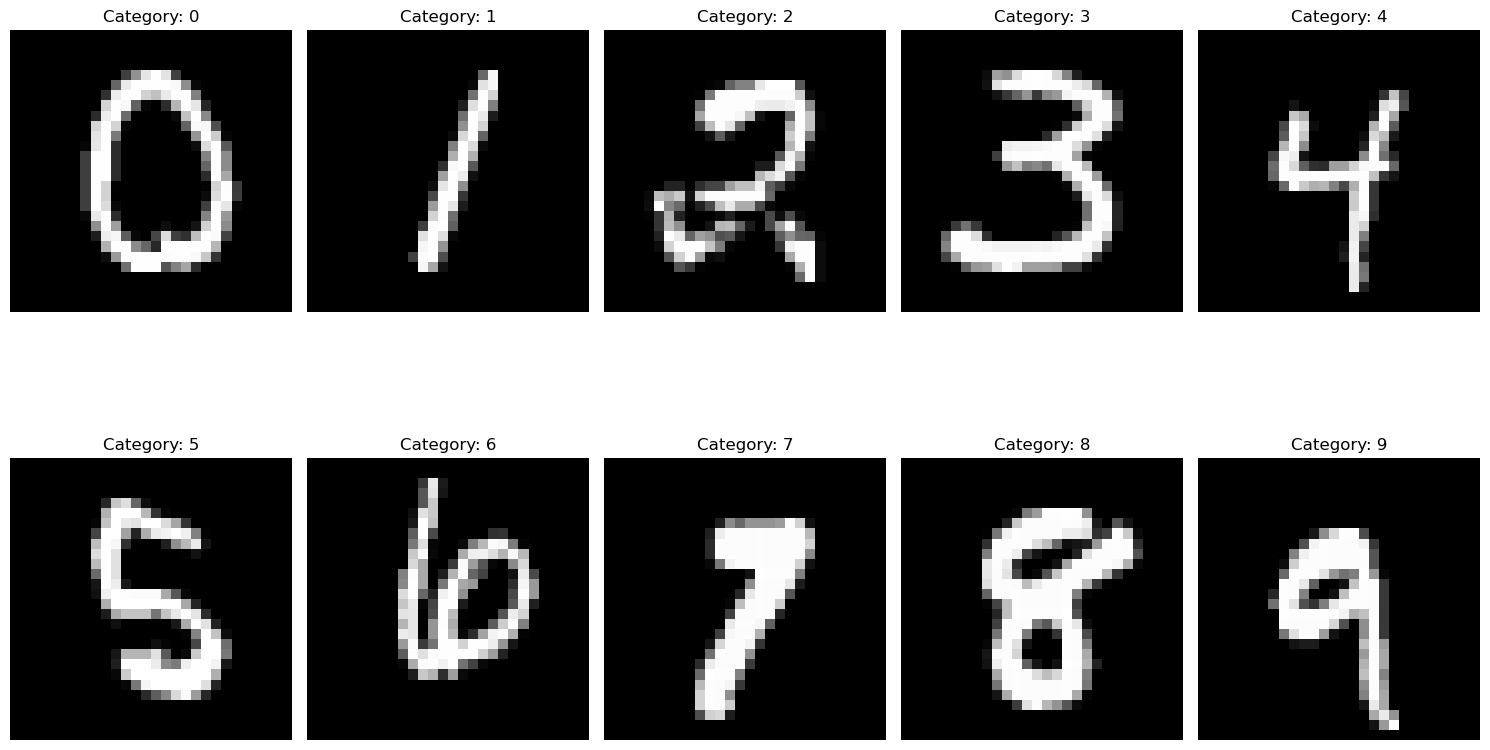

In [13]:
# Identify unique categories in the testing set
unique_categories = np.unique(y_test)

# Select one random example for each category
selected_indices = [np.random.choice(np.where(y_test == category)[0]) for category in unique_categories]

# Plot the images
plt.figure(figsize=(15, 10))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)  # Arrange the grid dynamically
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Category: {y_test[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Data Processing

#### 2.1 Subsetting

**7. Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

Initial Train Label Distribution (Percentage):
   Percentage
0    9.871667
1   11.236667
2    9.930000
3   10.218333
4    9.736667
5    9.035000
6    9.863333
7   10.441667
8    9.751667
9    9.915000

Reduced Train Label Distribution (Percentage):
   Percentage
0   10.650000
1   10.950000
2   10.016667
3   10.216667
4   10.683333
5    9.000000
6    9.250000
7   10.066667
8    9.466667
9    9.700000


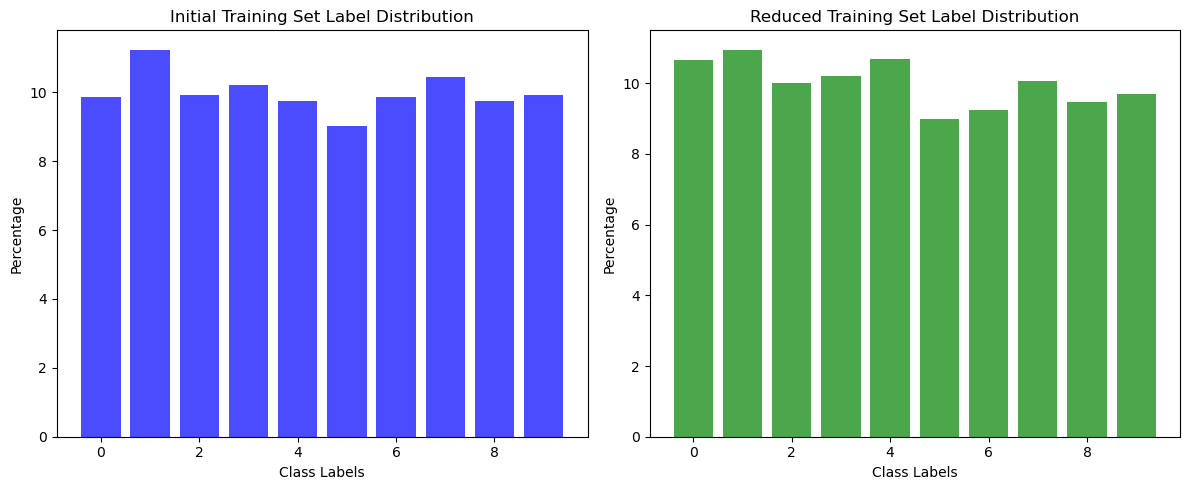

In [14]:
from collections import Counter

# Step 1: Create a 10% random subset of each training and testing set
subset_ratio = 0.1

# Randomly select 10% of the training set
train_indices = np.random.choice(len(x_train), int(len(x_train) * subset_ratio), replace=False)
x_train_subset = x_train[train_indices]
y_train_subset = y_train[train_indices]

# Randomly select 10% of the testing set
test_indices = np.random.choice(len(x_test), int(len(x_test) * subset_ratio), replace=False)
x_test_subset = x_test[test_indices]
y_test_subset = y_test[test_indices]

# Step 2: Calculate label distributions in the initial training set
initial_train_distribution = Counter(y_train)

# Step 3: Calculate label distributions in the reduced training set
reduced_train_distribution = Counter(y_train_subset)

# Step 4: Convert distributions to percentages
initial_train_distribution_df = pd.DataFrame.from_dict(
    {k: v / len(y_train) * 100 for k, v in initial_train_distribution.items()}, orient='index', columns=['Percentage']
)

reduced_train_distribution_df = pd.DataFrame.from_dict(
    {k: v / len(y_train_subset) * 100 for k, v in reduced_train_distribution.items()}, orient='index', columns=['Percentage']
)

# Sort by label for consistency
initial_train_distribution_df = initial_train_distribution_df.sort_index()
reduced_train_distribution_df = reduced_train_distribution_df.sort_index()

# Display the distributions
print("Initial Train Label Distribution (Percentage):")
print(initial_train_distribution_df)

print("\nReduced Train Label Distribution (Percentage):")
print(reduced_train_distribution_df)

# Plot the distributions
plt.figure(figsize=(12, 5))

# Initial Training Set Distribution
plt.subplot(1, 2, 1)
plt.bar(initial_train_distribution_df.index, initial_train_distribution_df['Percentage'], color='blue', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Percentage")
plt.title("Initial Training Set Label Distribution")

# Reduced Training Set Distribution
plt.subplot(1, 2, 2)
plt.bar(reduced_train_distribution_df.index, reduced_train_distribution_df['Percentage'], color='green', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Percentage")
plt.title("Reduced Training Set Label Distribution")

# Show the plots
plt.tight_layout()
plt.show()

**8. Now subset the first 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

Initial Train Label Distribution (Percentage):
   Percentage
0    9.871667
1   11.236667
2    9.930000
3   10.218333
4    9.736667
5    9.035000
6    9.863333
7   10.441667
8    9.751667
9    9.915000

Reduced First 10% Train Label Distribution (Percentage):
   Percentage
0    9.866667
1   11.183333
2    9.683333
3   10.133333
4   10.383333
5    8.566667
6   10.133333
7   10.850000
8    9.183333
9   10.016667


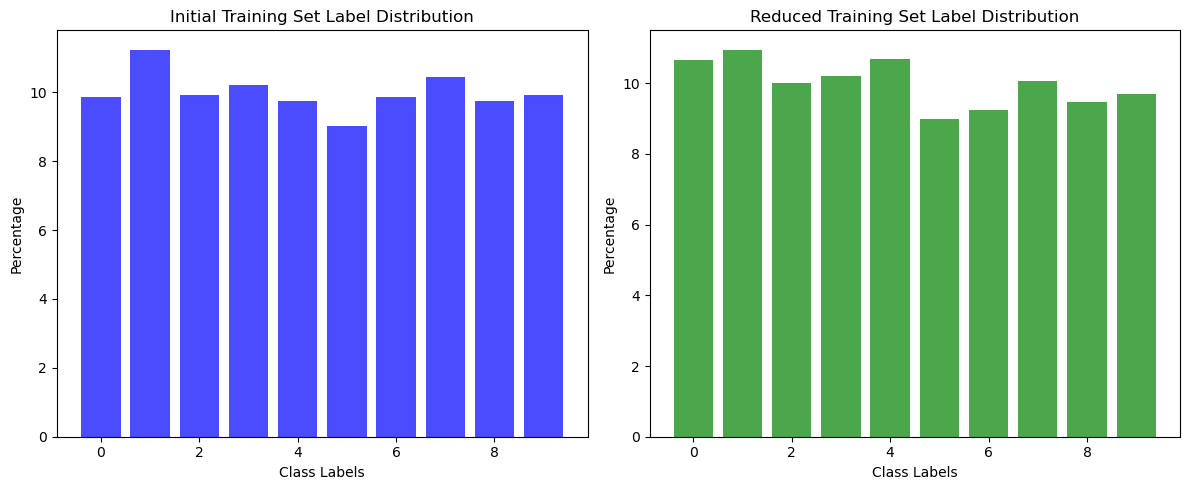

In [15]:
# Subset the first 10% of each training and testing set
subset_size_train = int(len(x_train) * 0.1)
subset_size_test = int(len(x_test) * 0.1)

# Select the first 10% of the data
x_train_subset_first = x_train[:subset_size_train]
y_train_subset_first = y_train[:subset_size_train]

x_test_subset_first = x_test[:subset_size_test]
y_test_subset_first = y_test[:subset_size_test]

# Calculate label distributions in the reduced first 10% training set
reduced_train_first_distribution = Counter(y_train_subset_first)

# Convert distributions to percentages
reduced_train_first_distribution_df = pd.DataFrame.from_dict(
    {k: v / len(y_train_subset_first) * 100 for k, v in reduced_train_first_distribution.items()},
    orient='index',
    columns=['Percentage']
)

# Sort by label for consistency
initial_train_distribution_df = initial_train_distribution_df.sort_index()
reduced_train_first_distribution_df = reduced_train_first_distribution_df.sort_index()

# Display initial and reduced distributions for comparison
print("Initial Train Label Distribution (Percentage):")
print(initial_train_distribution_df)

print("\nReduced First 10% Train Label Distribution (Percentage):")
print(reduced_train_first_distribution_df)

# Plot the distributions
plt.figure(figsize=(12, 5))

# Initial Training Set Distribution
plt.subplot(1, 2, 1)
plt.bar(initial_train_distribution_df.index, initial_train_distribution_df['Percentage'], color='blue', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Percentage")
plt.title("Initial Training Set Label Distribution")

# Reduced Training Set Distribution
plt.subplot(1, 2, 2)
plt.bar(reduced_train_distribution_df.index, reduced_train_distribution_df['Percentage'], color='green', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Percentage")
plt.title("Reduced Training Set Label Distribution")

# Show the plots
plt.tight_layout()
plt.show()

**9. When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?**

The percentage distribution of class labels in the reduced training dataset differed from that of the initial training dataset, but the percentage for each class label remained around 10%. However, there was no significant difference between the randomly reduced 10% subset and the first 10% subset. This may be because the MNIST dataset is inherently random.


**10. Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.**

Benefits of Subsampling a Dataset

- Subsampling a dataset can be highly beneficial when developing machine learning models because it enables work on machines with limited resources or accelerates workflows for early-stage experiments. It also allows quick visualizations and feedback on whether the model structure or parameters are reasonable by enabling faster iterations of model training, testing, and tuning.

Trade-offs of Subsampling

- Since a smaller dataset might not capture all patterns, especially rare ones, it may introduce bias and lead to decreased test performance on unseen data so it finally lead to reduced generalizability.

#### 2.2 Feature Engineering

**11-1. What are the features versus the output in this assignment?**

- Features (Inputs): Features represent the input data used by the model to learn patterns, as well as the independent variables that the model uses to make predictions. In this assignment, the features are the pixel values of the MNIST images. Each image is represented as a 2D array of size 28x28 where each pixel has an intensity value ranging from 0 (black) to 255 (white).
    * MNIST: Modified National Institute of Standards and Technology database

- Output (Labels): Outputs define the target values the model is trying to predict, as well as the dependent variables used to evaluate the model’s predictions. In this assignment, the output is the digit (0–9) that the image represents. This is a single scalar value for each sample, and it serves as the ground truth for training and evaluation.

**11-2. Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?**

In machine learning, it is crucial to distinguish between features (inputs) and outputs (labels) since the model cannot be trained effectively to predict the desired outcome without a clear distinction of them.

**12. Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.**

The mean image was visually represented by the shape of the number 3. The color transitioned in intensity from white on the number 3 to black on the outside. The standard deviation image was also visually represented by the shape of the number 3, with a brighter border and a darkened inside the number, and then transitioned in intensity to black on the outside. There was no significant difference between training and test images, binarized and non-binarized images.

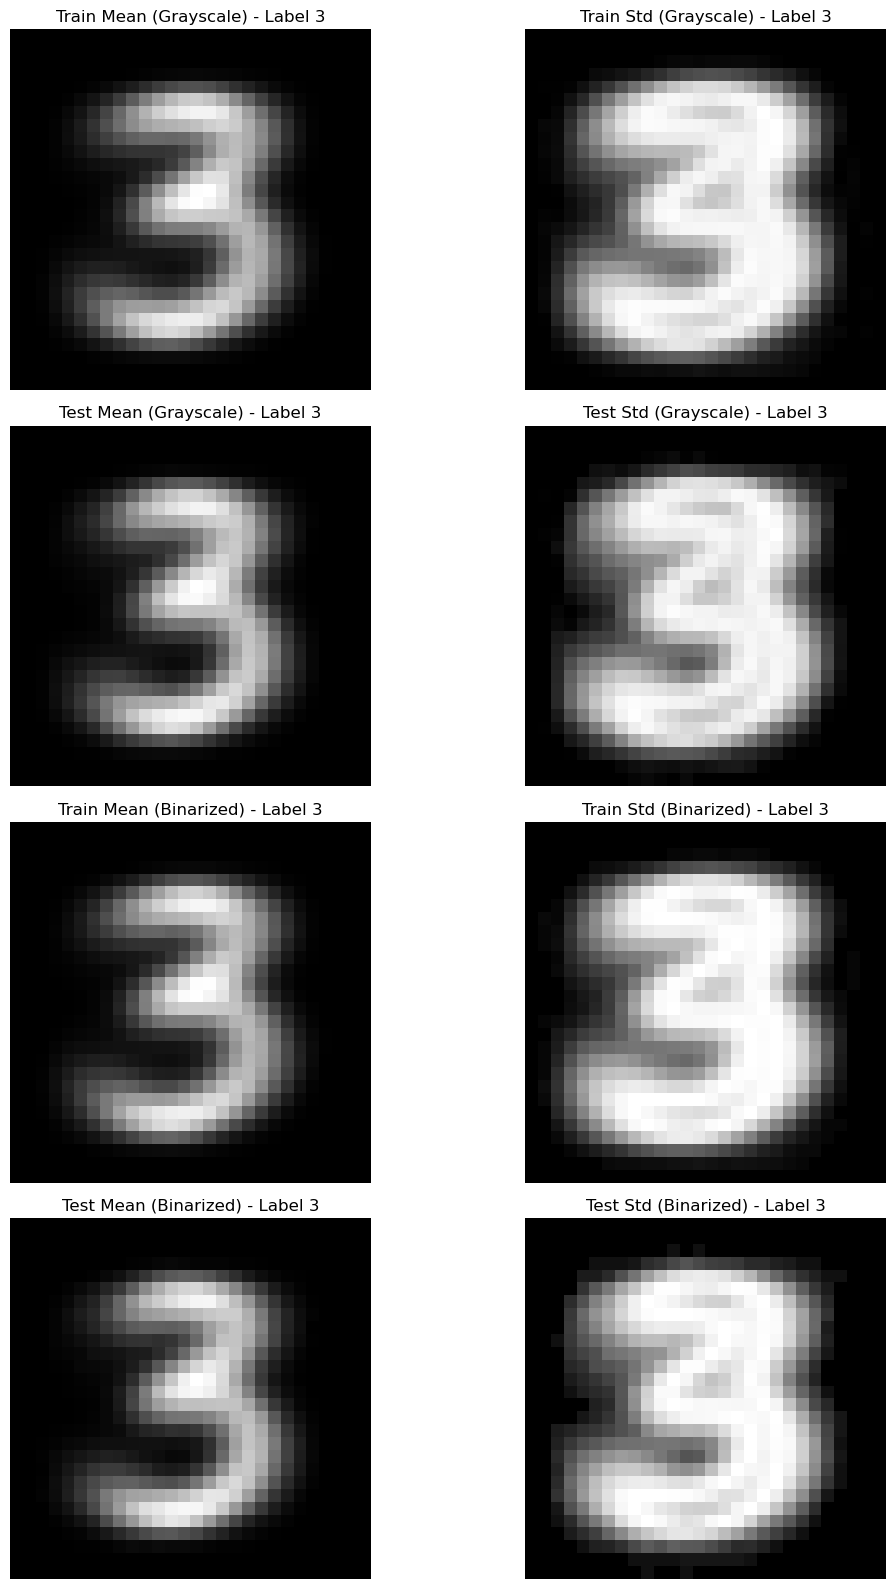

In [16]:
# Select all train and test images labeled "3"
train_images_3 = x_train[y_train == 3]
test_images_3 = x_test[y_test == 3]

# Compute the mean and standard deviation images for the original (grayscale) images
train_mean_3 = np.mean(train_images_3, axis=0)
train_std_3 = np.std(train_images_3, axis=0)
test_mean_3 = np.mean(test_images_3, axis=0)
test_std_3 = np.std(test_images_3, axis=0)

# Binarize the images (convert pixel values to 0 or 1 based on a threshold of 128)
train_images_3_binary = (train_images_3 >= 128).astype(np.float32)
test_images_3_binary = (test_images_3 >= 128).astype(np.float32)

# Compute the mean and standard deviation images for the binarized images
train_mean_3_binary = np.mean(train_images_3_binary, axis=0)
train_std_3_binary = np.std(train_images_3_binary, axis=0)
test_mean_3_binary = np.mean(test_images_3_binary, axis=0)
test_std_3_binary = np.std(test_images_3_binary, axis=0)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Original images (grayscale)
axs[0, 0].imshow(train_mean_3, cmap='gray')
axs[0, 0].set_title("Train Mean (Grayscale) - Label 3")
axs[0, 0].axis('off')

axs[0, 1].imshow(train_std_3, cmap='gray')
axs[0, 1].set_title("Train Std (Grayscale) - Label 3")
axs[0, 1].axis('off')

axs[1, 0].imshow(test_mean_3, cmap='gray')
axs[1, 0].set_title("Test Mean (Grayscale) - Label 3")
axs[1, 0].axis('off')

axs[1, 1].imshow(test_std_3, cmap='gray')
axs[1, 1].set_title("Test Std (Grayscale) - Label 3")
axs[1, 1].axis('off')

# Binarized images
axs[2, 0].imshow(train_mean_3_binary, cmap='gray')
axs[2, 0].set_title("Train Mean (Binarized) - Label 3")
axs[2, 0].axis('off')

axs[2, 1].imshow(train_std_3_binary, cmap='gray')
axs[2, 1].set_title("Train Std (Binarized) - Label 3")
axs[2, 1].axis('off')

axs[3, 0].imshow(test_mean_3_binary, cmap='gray')
axs[3, 0].set_title("Test Mean (Binarized) - Label 3")
axs[3, 0].axis('off')

axs[3, 1].imshow(test_std_3_binary, cmap='gray')
axs[3, 1].set_title("Test Std (Binarized) - Label 3")
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()

**13. Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.**

The mean image was visually represented by the shape of the number 7. The color transitioned in intensity from white on the number 7 to black on the outside. The standard deviation image was also visually represented by the shape of the number 7, with a brighter border and a darkened inside the number, and then transitioned in intensity to black on the outside. There was no significant difference between training and test images, binarized and non-binarized images.

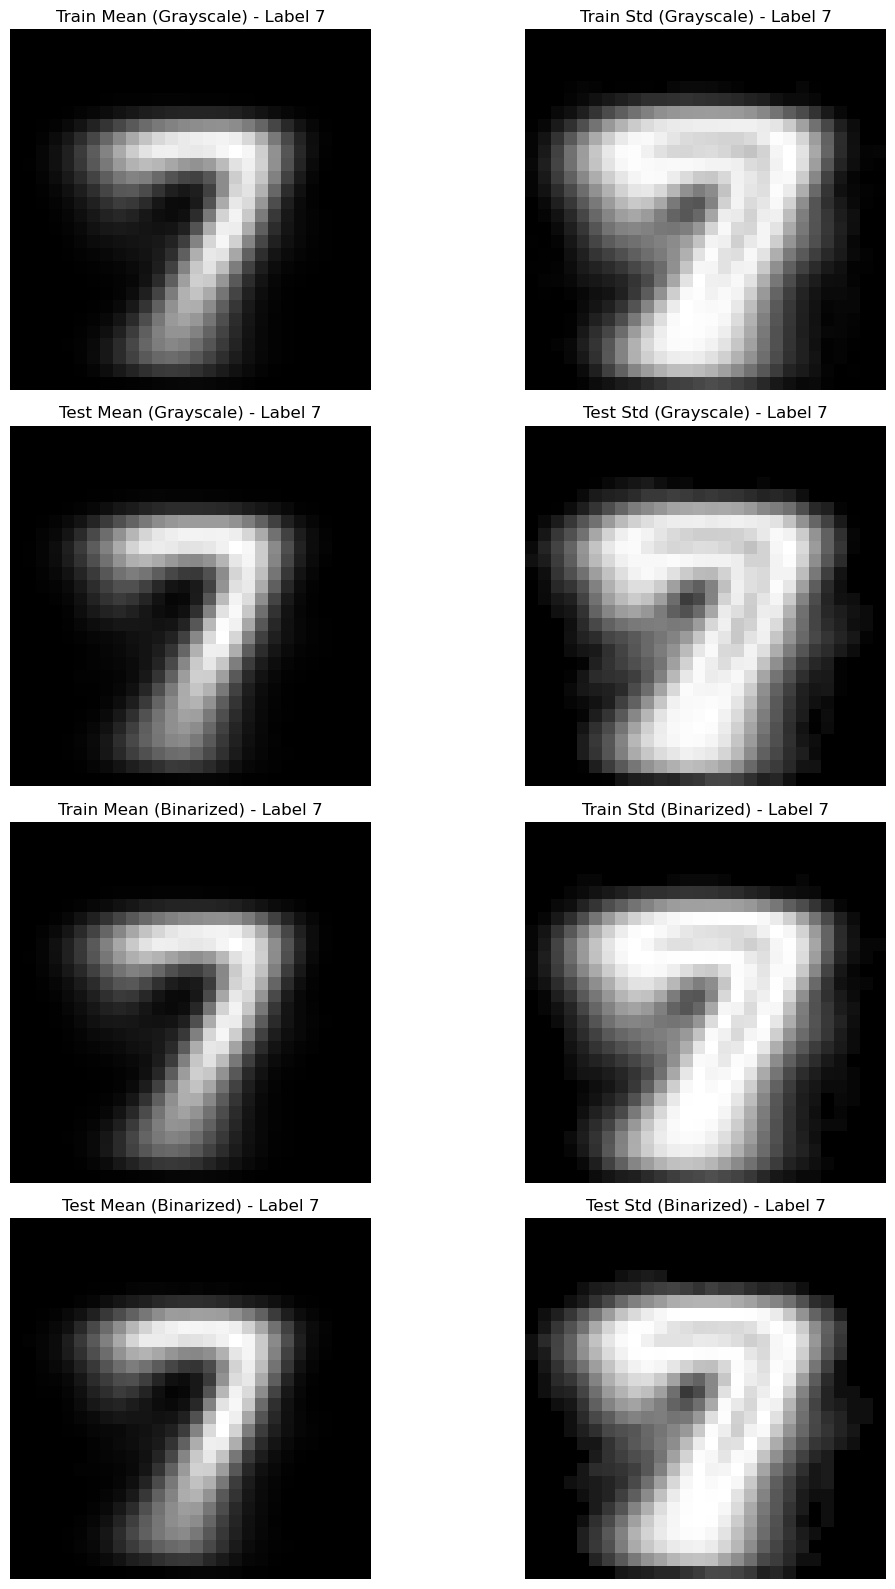

In [17]:
# Select all train and test images labeled "7"
train_images_7 = x_train[y_train == 7]
test_images_7 = x_test[y_test == 7]

# Compute the mean and standard deviation images for the original (grayscale) images
train_mean_7 = np.mean(train_images_7, axis=0)
train_std_7 = np.std(train_images_7, axis=0)
test_mean_7 = np.mean(test_images_7, axis=0)
test_std_7 = np.std(test_images_7, axis=0)

# Binarize the images (convert pixel values to 0 or 1 based on a threshold of 128)
train_images_7_binary = (train_images_7 >= 128).astype(np.float32)
test_images_7_binary = (test_images_7 >= 128).astype(np.float32)

# Compute the mean and standard deviation images for the binarized images
train_mean_7_binary = np.mean(train_images_7_binary, axis=0)
train_std_7_binary = np.std(train_images_7_binary, axis=0)
test_mean_7_binary = np.mean(test_images_7_binary, axis=0)
test_std_7_binary = np.std(test_images_7_binary, axis=0)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Original images (grayscale)
axs[0, 0].imshow(train_mean_7, cmap='gray')
axs[0, 0].set_title("Train Mean (Grayscale) - Label 7")
axs[0, 0].axis('off')

axs[0, 1].imshow(train_std_7, cmap='gray')
axs[0, 1].set_title("Train Std (Grayscale) - Label 7")
axs[0, 1].axis('off')

axs[1, 0].imshow(test_mean_7, cmap='gray')
axs[1, 0].set_title("Test Mean (Grayscale) - Label 7")
axs[1, 0].axis('off')

axs[1, 1].imshow(test_std_7, cmap='gray')
axs[1, 1].set_title("Test Std (Grayscale) - Label 7")
axs[1, 1].axis('off')

# Binarized images
axs[2, 0].imshow(train_mean_7_binary, cmap='gray')
axs[2, 0].set_title("Train Mean (Binarized) - Label 7")
axs[2, 0].axis('off')

axs[2, 1].imshow(train_std_7_binary, cmap='gray')
axs[2, 1].set_title("Train Std (Binarized) - Label 7")
axs[2, 1].axis('off')

axs[3, 0].imshow(test_mean_7_binary, cmap='gray')
axs[3, 0].set_title("Test Mean (Binarized) - Label 7")
axs[3, 0].axis('off')

axs[3, 1].imshow(test_std_7_binary, cmap='gray')
axs[3, 1].set_title("Test Std (Binarized) - Label 7")
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()

**14. Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.**

The image binarized by mean value is blurrier than the one binarized by 128.

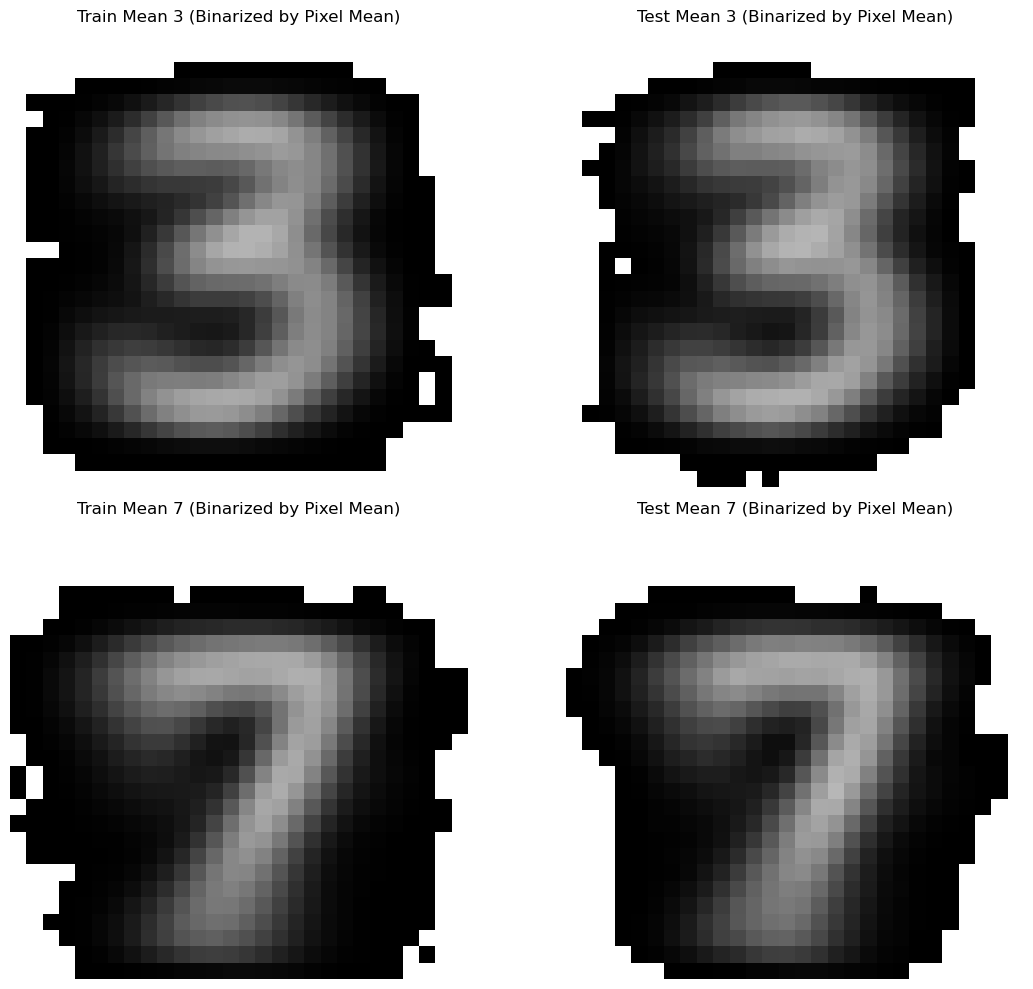

In [67]:
# Binarize the images (convert pixel values to 0 or 1 based on a threshold of the mean pixel value at each specific pixel location across all images of the same letter.)
train_images_3_binary2 = (train_images_3 >= train_mean_3).astype(np.float32)
test_images_3_binary2 = (test_images_3 >= test_mean_3).astype(np.float32)
train_images_7_binary2 = (train_images_7 >= train_mean_7).astype(np.float32)
test_images_7_binary2 = (test_images_7 >= test_mean_7).astype(np.float32)

# Compute the mean and standard deviation images for the binarized images
train_mean_3_binary2 = np.mean(train_images_3_binary2, axis=0)
test_mean_3_binary2 = np.mean(test_images_3_binary2, axis=0)
train_mean_7_binary2 = np.mean(train_images_7_binary2, axis=0)
test_mean_7_binary2 = np.mean(test_images_7_binary2, axis=0)

# Visualization of the binarized images based on their mean value
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(train_mean_3_binary2, cmap='gray')
axs[0, 0].set_title("Train Mean 3 (Binarized by Pixel Mean)")
axs[0, 0].axis('off')

axs[0, 1].imshow(test_mean_3_binary2, cmap='gray')
axs[0, 1].set_title("Test Mean 3 (Binarized by Pixel Mean)")
axs[0, 1].axis('off')

axs[1, 0].imshow(train_mean_7_binary2, cmap='gray')
axs[1, 0].set_title("Train Mean 7 (Binarized by Pixel Mean)")
axs[1, 0].axis('off')

axs[1, 1].imshow(test_mean_7_binary2, cmap='gray')
axs[1, 1].set_title("Test Mean 7 (Binarized by Pixel Mean)")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

**15. In plain English, what are we actually doing when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?**

First, we selected all train and test images labeled "3" or "7". Second, we computed the mean and standard deviation images for the original images, which is grayscale. The mean refers to the average pixel value at each specific pixel location across all images of the same letter. Third, we binarized the images by converting pixel values to 0 or 1 based on a threshold. As a threshold, we used 128, which is the median of 0-255 range in the first case, and we used the mean of the pixel value in the second case. Finally, we computed the mean of images for all the binarized images.

**16. What is the index of the most dissimilar image in category "3" in the training set for the regular images? What about the most similar image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.**

The most similar and most dissimilar images may change for the binarized images because binarization reduces the pixel value information to binary values (0 or 1). This can affect the Euclidean distance calculation, as the differences in pixel intensities are no longer considered, only the presence or absence of a feature.

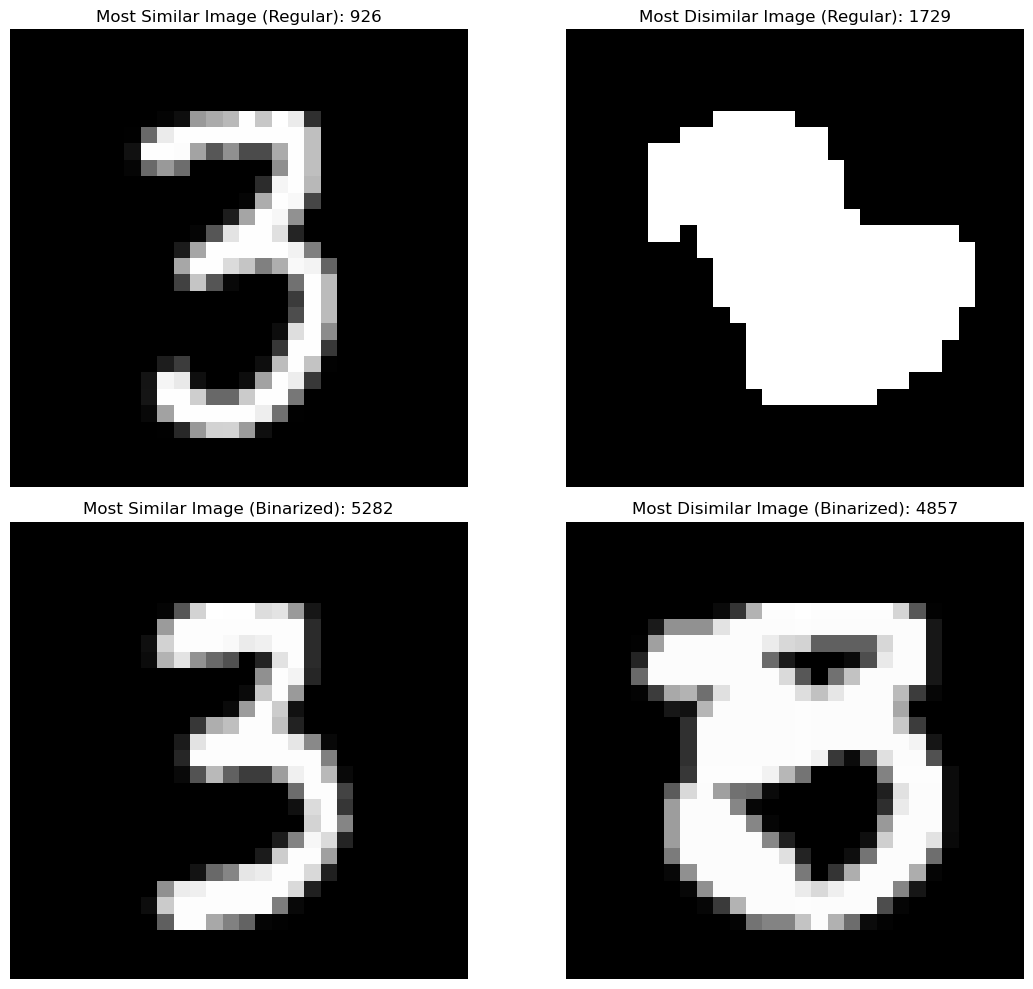

In [73]:
# Calculate dissimilarity and similarity for regular images in category "3" (training set)
# Using Euclidean distance from the mean image as the measure of (dis)similarity
from scipy.spatial.distance import euclidean

# Compute the Euclidean distance for each image from the mean image
distances = np.array([euclidean(img.flatten(), train_mean_3.flatten()) for img in train_images_3])

# Find the indices of the most similar and most dissimilar images
most_similar_index_3 = np.argmin(distances)
most_dissimilar_index_3 = np.argmax(distances)

# Binarize the images based on the mean value for each pixel
train_images_3_binarized = (train_images_3 > train_mean_3).astype(int)

# Calculate the mean image for binarized category "3"
train_mean_3_binarized = np.mean(train_images_3_binarized, axis=0)

# Calculate the Euclidean distance between each binarized image and the binarized mean image
distances_binarized = np.array([euclidean(img.flatten(), train_mean_3_binarized.flatten()) for img in train_images_3_binarized])

# Find the index of the most similar and most dissimilar binarized images
most_similar_index_3binarized = np.argmin(distances_binarized)
most_dissimilar_index_3binarized = np.argmax(distances_binarized)

# Plot the most similar and most dissimilar images
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(train_images_3[most_similar_index_3], cmap='gray')
axs[0, 0].set_title(f"Most Similar Image (Regular): {most_similar_index_3}")
axs[0, 0].axis('off')

axs[0, 1].imshow(train_images_3[most_dissimilar_index_3], cmap='gray')
axs[0, 1].set_title(f"Most Disimilar Image (Regular): {most_dissimilar_index_3}")
axs[0, 1].axis('off')

axs[1, 0].imshow(train_images_3[most_similar_index_3binarized], cmap='gray')
axs[1, 0].set_title(f"Most Similar Image (Binarized): {most_similar_index_3binarized}")
axs[1, 0].axis('off')

axs[1, 1].imshow(train_images_3[most_dissimilar_index_3binarized], cmap='gray')
axs[1, 1].set_title(f"Most Disimilar Image (Binarized): {most_dissimilar_index_3binarized}")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

**17. What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?**

Binarization simplifies image data by reducing each pixel’s value to one of two states (0 or 1). While this can make models more efficient and focused for a machine learning, it also introduces trade-offs in how features are represented.

Benefits:

- Models have fewer unique input values to process (only 0 or 1), simplifying computations and reducing memory usage.

- Binarization reduces the influence of small variations in pixel intensity, focusing on the overall structure of the image. This can improve model performance in noisy or inconsistent datasets. By emphasizing the presence or absence of features, binarization can make key patterns (e.g., edges, shapes) more pronounced and easier for models to learn.

Limitations:

- This can negatively impact tasks requiring subtle feature differentiation (e.g., distinguishing similar digits like “3” and “8”).

- A poorly chosen threshold might ignore important features or emphasize irrelevant ones.

- Overemphasis on high-contrast areas might lead to poorer performance on tasks that require contextual understanding of pixel intensities.

- Simplified binary representations might cause the model to overfit to prominent structures while ignoring more complex patterns.

**18. How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?**

Relation to the Idea of Standardizing Data

*Data standardization is a technique that is performed as a pre-processing step before inputting data into many machine learning models, to standardize the range of features of an input data set.* Binarizing images that we have just done is one of the methods of standardizing data by making 0-255 range to 0-1 two values. While the methods and goals differ in machine learning, it helps improving the model’s ability to learn effectively by adjusting the scale, representation, or structure of the data.

Why Standardizing Data Is Important to Train a Model?

1. Improves Convergence During Training:

- Models like neural networks are sensitive to input scales. If features have vastly different ranges, the optimization process (e.g., gradient descent) may converge slowly or get stuck.

2. Ensures Fair Comparisons Between Features:

- Features with larger ranges can dominate the learning process, overshadowing smaller-scale features.

- Standardization equalizes feature importance, ensuring the model learns from all relevant inputs.

3. Enhances Model Interpretability:

- Standardized data allows for easier interpretation of weights or feature importance, as the values are scaled consistently.

4. Reduces Numerical Instability:

- Algorithms involving matrix operations (e.g., SVM, PCA) can become numerically unstable if the data values are not normalized or standardized.

- Standardization avoids extreme values that could cause computational issues.

https://builtin.com/data-science/when-and-why-standardize-your-data#:~:text=Data%20standardization%20transforms%20data%20into%20a%20consistent%2C,reduce%20costs%20and%20save%20time%20for%20businesses.

**19. Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?**

The pixel-wise mean image is calculated by averaging the pixel values at each position across all images in the set. The mean image helps to understand the common features and overall structure of the images in the category. For example, in the case of digit "3" from the MNIST dataset, the mean image will highlight the typical shape and stroke patterns of the digit "3".

The pixel-wise standard deviation image is calculated by computing the standard deviation of the pixel values at each position across all images in the set. The standard deviation image helps to understand the variations and inconsistencies within the category. It highlights the regions where the pixel values vary the most among the images.

A high standard deviation at a particular pixel position indicates that the pixel values at that position vary significantly across the images. This could be due to different handwriting styles, noise and artifacts. 

### 3. Model Training, Validation, and Intepretation

#### 3.1 Support Vector Machine

**20-1. From the training dataset, select only images from categories "3" and "9". Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2.**

In [81]:
# Select images from categories "3" and "9" from the training dataset
train_filter = np.where((y_train == 3) | (y_train == 9))
test_filter = np.where((y_test == 3) | (y_test == 9))

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

print(f"x_train_filtered shape: {x_train_filtered.shape}")
print(f"y_train_filtered shape: {y_train_filtered.shape}")

x_train_filtered shape: (12080, 28, 28)
y_train_filtered shape: (12080,)


In [82]:
from sklearn.model_selection import train_test_split

# Split the filtered training data into Set1 (60%) and Set2 (40%)
x_set1, x_set2, y_set1, y_set2 = train_test_split(x_train_filtered, y_train_filtered, test_size=0.4, random_state=42)

In [83]:
# Replace labels: 0 for "3" and 1 for "9"
y_set1 = np.where(y_set1 == 3, 0, 1)
y_set2 = np.where(y_set2 == 3, 0, 1)
y_train_filtered = np.where(y_train_filtered == 3, 0, 1)

# Verify the label replacement
print(f"Unique labels in y_set1: {np.unique(y_set1)}")
print(f"Unique labels in y_set2: {np.unique(y_set2)}")
print(f"Unique labels in y_test_filtered: {np.unique(y_train_filtered)}")

Unique labels in y_set1: [0 1]
Unique labels in y_set2: [0 1]
Unique labels in y_test_filtered: [0 1]


**20-2. What is the prediction accuracy using the model trained on the training set?**

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten the images for SVM input
x_set1_flat = x_set1.reshape(x_set1.shape[0], -1)
x_set2_flat = x_set2.reshape(x_set2.shape[0], -1)

# Train a linear SVM classifier on Set1
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_set1_flat, y_set1)

# Predict labels for Set2
y_pred_set2 = svm_model.predict(x_set2_flat)

# Compute accuracy for Set2 predictions
accuracy_set2 = accuracy_score(y_set2, y_pred_set2)

# Display results
print("Accuracy on Set2 (40% of training data):", accuracy_set2)

Accuracy on Set2 (40% of training data): 0.9743377483443708


Accuracy on training set: 97.4%

**20-3. What is the prediction accuracy using the model trained on the testing set?**

In [85]:
# What is the prediction accuracy using the model trained on the testing set?

# Replace labels: 0 for "3" and 1 for "9" in the test set
y_test_filtered = np.where(y_test_filtered == 3, 0, 1)

# Flatten the images for SVM input
x_test_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

# Predict labels for the test set
y_pred_test = svm_model.predict(x_test_flat)

# Compute accuracy for test set predictions
accuracy_test = accuracy_score(y_test_filtered, y_pred_test)

# Display results
print("Accuracy on the test set:", accuracy_test)


Accuracy on the test set: 0.9772164437840515


ACCURACY ON THE TEST SET: 97.7%

#### 3.2 Modeling with Engineered Data

**21-1. We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:<br>- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.<br>- For each image row i, find n_i, the sum of 1's in the row (28 features).<br>- For each image column j, find n_j, the sum of 1's in the column (28 features).<br>- Concatenate these features to form a feature vector of 56 features.**

In [86]:
# Function to binarize and extract features
def extract_features(images):
    features = []
    for img in images:
        binarized_img = (img > 128).astype(int)
        row_sums = np.sum(binarized_img, axis=1)
        column_sums = np.sum(binarized_img, axis=0)
        feature_vector = np.concatenate((row_sums, column_sums))
        features.append(feature_vector)
    return np.array(features)

In [87]:
# Extract features for Set1, Set2, and the test set
x_set1_features = extract_features(x_set1)
x_set2_features = extract_features(x_set2)
x_test_features = extract_features(x_test_filtered)

In [88]:
# Train a linear SVM classifier on Set1
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_set1_features, y_set1)

# Predict labels for Set2
y_pred_set2 = svm_model.predict(x_set2_features)

# Compute accuracy for Set2 predictions
accuracy_set2 = accuracy_score(y_set2, y_pred_set2)

# Predict labels for the test set
y_pred_test = svm_model.predict(x_test_features)

# Compute accuracy for test set predictions
accuracy_test = accuracy_score(y_test_filtered, y_pred_test)

**21-2. What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set?**

In [89]:
# Display results
print("Accuracy on Set2 (40% of training data):", accuracy_set2)
print("Accuracy on the test set:", accuracy_test)

Accuracy on Set2 (40% of training data): 0.9646109271523179
Accuracy on the test set: 0.962852897473997


96.5%, 96.3%

**21-3. How about the prediction accuracy of a KNN model trained on the training set? And on the testing set?**

In [90]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier on Set1
knn_model = KNeighborsClassifier()
knn_model.fit(x_set1_features, y_set1)

# Predict labels for Set2 using KNN
y_pred_set2_knn = knn_model.predict(x_set2_features)

# Compute accuracy for Set2 predictions using KNN
accuracy_set2_knn = accuracy_score(y_set2, y_pred_set2_knn)

# Predict labels for the test set using KNN
y_pred_test_knn = knn_model.predict(x_test_features)

# Compute accuracy for test set predictions using KNN
accuracy_test_knn = accuracy_score(y_test_filtered, y_pred_test_knn)

# Display results
print("KNN Accuracy on Set2 (40% of training data):", accuracy_set2_knn)
print("KNN Accuracy on the test set:", accuracy_test_knn)

KNN Accuracy on Set2 (40% of training data): 0.9689569536423841
KNN Accuracy on the test set: 0.9658246656760773


96.9%, 96.6%

**21-4. What does this tell you about the potential impacts of feature engineering?**

Using a reduced set decreased the accuracy of 1%p in both the split training set (set2) and the test set. 

#### 3.3 K-Nearest Neighbors

**22. In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.**

**23. For k = 4, what is the label that was predicted with lowest accuracy?**

Label with the lowest accuracy: 9

**24. For k = 20, what is the label that was predicted with lowest accuracy?**

Label with the lowest accuracy: 7

**25. What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?**

Class 7 is labeled as class 1 (see the confusion matrix).

In [97]:
# Select only images with labels 1, 3, 5, 7, and 9
train_filter = np.where((y_train == 1) | (y_train == 3) | (y_train == 5) | (y_train == 7) | (y_train == 9))
test_filter = np.where((y_test == 1) | (y_test == 3) | (y_test == 5) | (y_test == 7) | (y_test == 9))

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

In [98]:
from sklearn.metrics import confusion_matrix

# Flatten the images for k-NN input
x_train_filtered_flat = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_filtered_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

# Train and evaluate k-NN classifier for different values of k
k_values = range(4, 41, 4)
accuracies = []
labels = [1, 3, 5, 7, 9]

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_filtered_flat, y_train_filtered)
    
    # Predict labels for the test set
    y_pred_test = knn_model.predict(x_test_filtered_flat)
    
    # Compute accuracy for test set predictions
    accuracy_test = accuracy_score(y_test_filtered, y_pred_test)
    accuracies.append(accuracy_test)
    
    # Compute accuracy for each label
    conf_matrix = confusion_matrix(y_test_filtered, y_pred_test, labels=labels)
    label_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    # Find the label with the lowest accuracy
    lowest_accuracy_label = labels[np.argmin(label_accuracies)]
    lowest_accuracy = np.min(label_accuracies)

    # Find the label pair that was confused most often
    conf_matrix_no_diag = conf_matrix.copy()
    np.fill_diagonal(conf_matrix_no_diag, 0)
    max_confusion_indices = np.unravel_index(np.argmax(conf_matrix_no_diag), conf_matrix_no_diag.shape)
    label_pair_most_confused = (labels[max_confusion_indices[0]], labels[max_confusion_indices[1]])
    confusion_count = conf_matrix[max_confusion_indices]

    print(f"Accuracy with k={k}: {accuracy_test}")
    print(f" Label with the lowest accuracy: {lowest_accuracy_label}")
    print(f" Accuracy for label {lowest_accuracy_label}: {lowest_accuracy}")
    print(f" Label pair most confused: {label_pair_most_confused}")
    print(f" Number of times confused: {confusion_count}")

# Display results
print("k values:", k_values)
print("Accuracies:", accuracies)

Accuracy with k=4: 0.9767441860465116
 Label with the lowest accuracy: 9
 Accuracy for label 9: 0.9643211100099108
 Label pair most confused: (7, 1)
 Number of times confused: 25
Accuracy with k=8: 0.9771383523847064
 Label with the lowest accuracy: 7
 Accuracy for label 7: 0.9620622568093385
 Label pair most confused: (7, 1)
 Number of times confused: 29
Accuracy with k=12: 0.9767441860465116
 Label with the lowest accuracy: 7
 Accuracy for label 7: 0.9601167315175098
 Label pair most confused: (7, 1)
 Number of times confused: 29
Accuracy with k=16: 0.9761529365392195
 Label with the lowest accuracy: 7
 Accuracy for label 7: 0.958171206225681
 Label pair most confused: (7, 1)
 Number of times confused: 29
Accuracy with k=20: 0.9753646038628301
 Label with the lowest accuracy: 7
 Accuracy for label 7: 0.9571984435797666
 Label pair most confused: (7, 1)
 Number of times confused: 29
Accuracy with k=24: 0.9739850216791486
 Label with the lowest accuracy: 7
 Accuracy for label 7: 0.9513

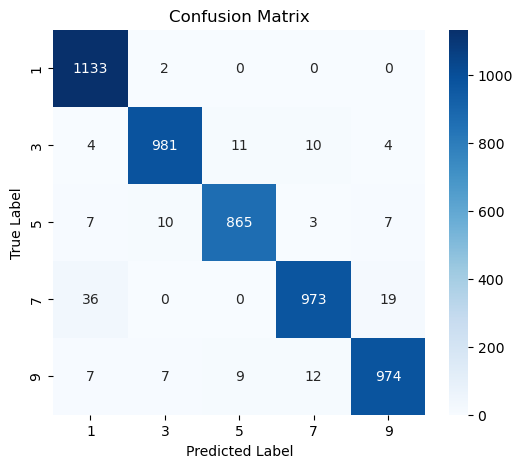

In [103]:
import seaborn as sns

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels, title, and formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

**26. Visualize 5 mislabeled samples with their actual and predicted labels.**

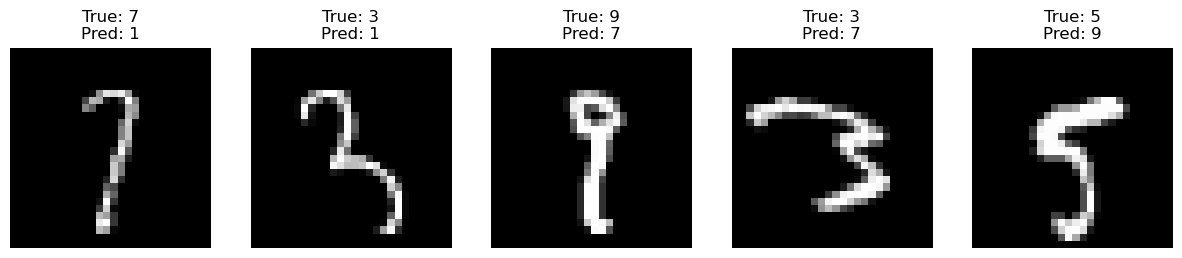

In [102]:
# Identify mislabeled samples
mislabeled_indices = np.where(y_pred_test != y_test_filtered)[0]

# Select 5 mislabeled samples
num_samples = min(5, len(mislabeled_indices))
selected_indices = mislabeled_indices[:num_samples]

# Plot the mislabeled samples with their actual and predicted labels
plt.figure(figsize=(15, 5))
for i, index in enumerate(selected_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test_filtered[index], cmap='gray')
    plt.title(f"True: {y_test_filtered[index]}\nPred: {y_pred_test[index]}")
    plt.axis('off')

plt.show()

**27. Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.**

Considering the similarity in shapes, class 7 may be easily mispredicted for class 7 as class 1 or class 9. This corresponds to the result of the confusion matrix above.

#### 3.4 Comprehension Questions

**28. Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?**

Training datasets are used to train the model, allowing it to learn patterns and relationships within the data. On the other hand, testing datasets are used to evaluate the model's performance on unseen data, providing an estimate of how well the model generalizes to new, real-world data. Therefore, if training and testing datasets are overlapped, it can lead to overfit as well as less confidence in the model's ability to generalize to new data.

**29. If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?**

This case typically indicates that the model is overfitting. Overfitting occurs when a model learns the training data too well, including noise and specific details that do not generalize to new, unseen data. 
